In [1]:
import gym
from gym.envs.registration import register


max_episode_steps = 2000
register(
    id="FurutaPendulum-v0",
    entry_point="furuta_pendulum_full:FurutaPendulumEnv",
    max_episode_steps=max_episode_steps,
)


def simulate(action):
    env = gym.make("FurutaPendulum-v0", render_mode="human")
    env.reset()
    obs = env.reset_model()

    observations = []
    rewards = []

    for _ in range(max_episode_steps):
        obs, reward, done, info, _ = env.step([action])
        observations.append(obs)
        rewards.append(reward)
        env.render()
        if done:
            break
    env.close()

    return observations, rewards

In [2]:
import matplotlib.pyplot as plt

def plot_observations(observations):
    for i in [0, 2, 4]:
        plt.figure(figsize=(12, 8))
        plt.plot([x[i] for x in observations])
        plt.plot([x[i + 1] for x in observations])
        plt.legend()
        plt.grid(True)
        plt.show()

def plot_value(rewards):
    plt.figure(figsize=(12, 8))
    plt.plot(rewards)
    plt.legend()
    plt.grid(True)
    plt.show()

/home/pendulum/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


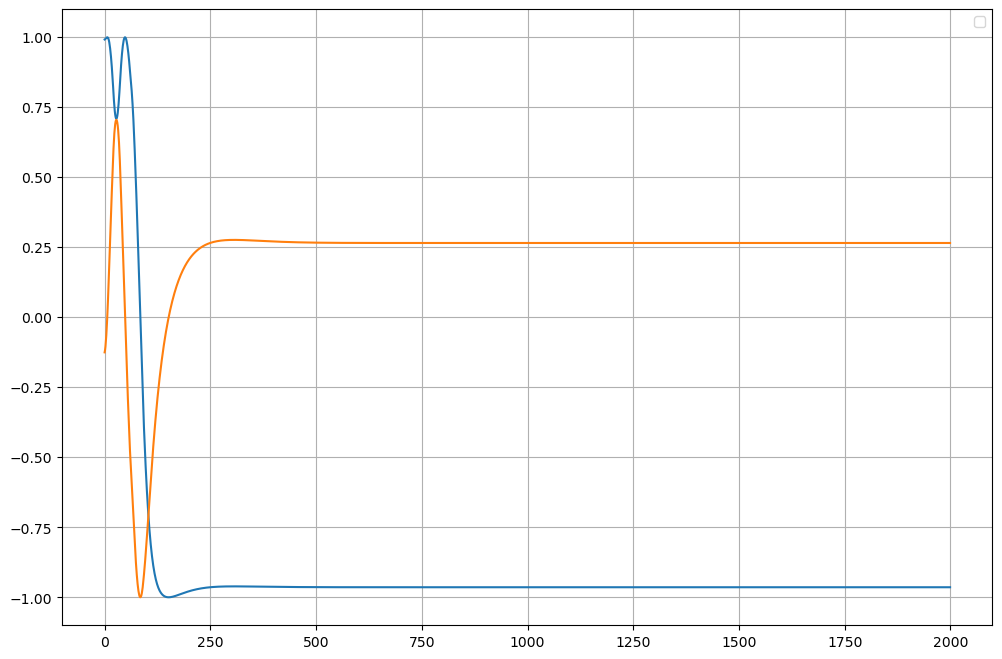

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


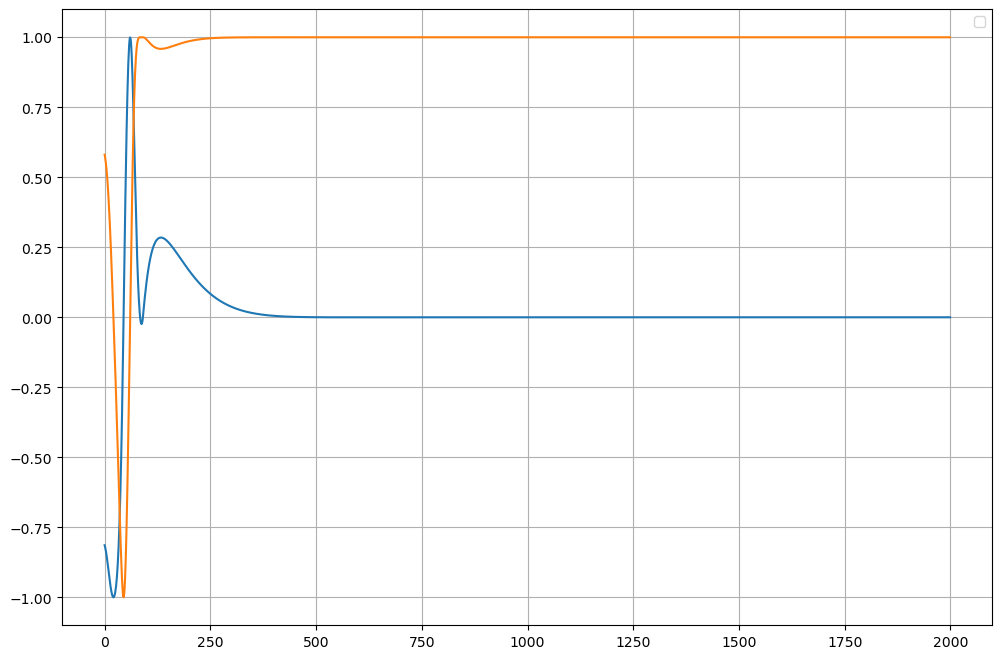

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


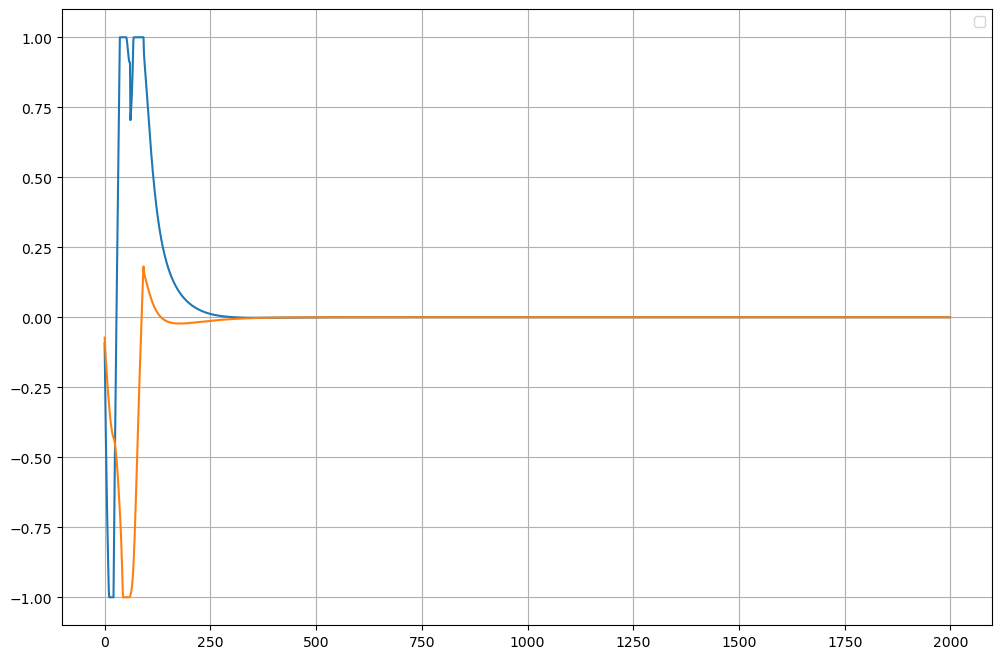

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


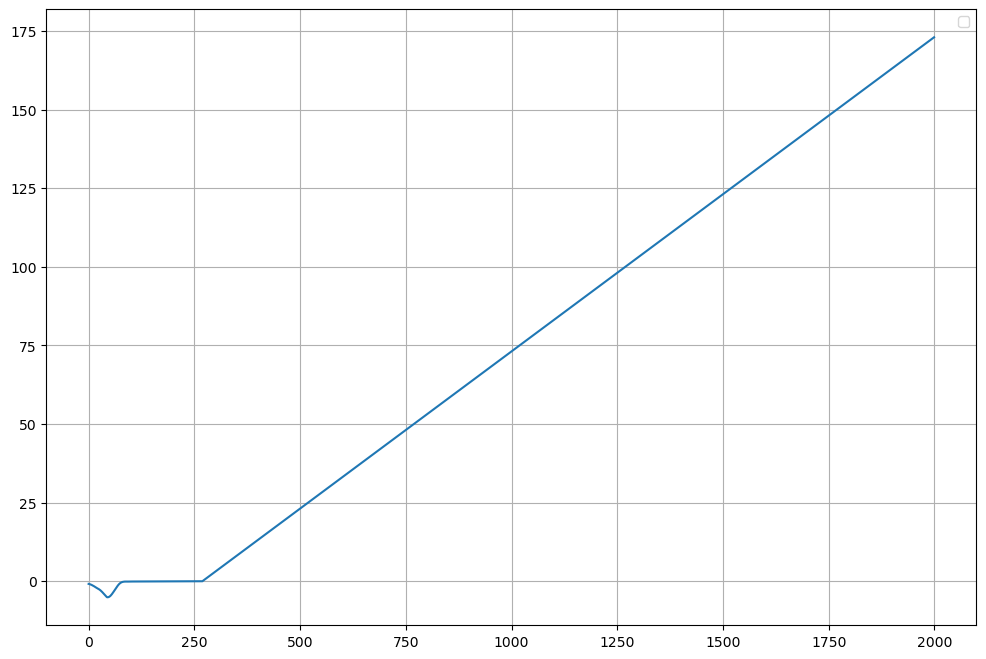

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


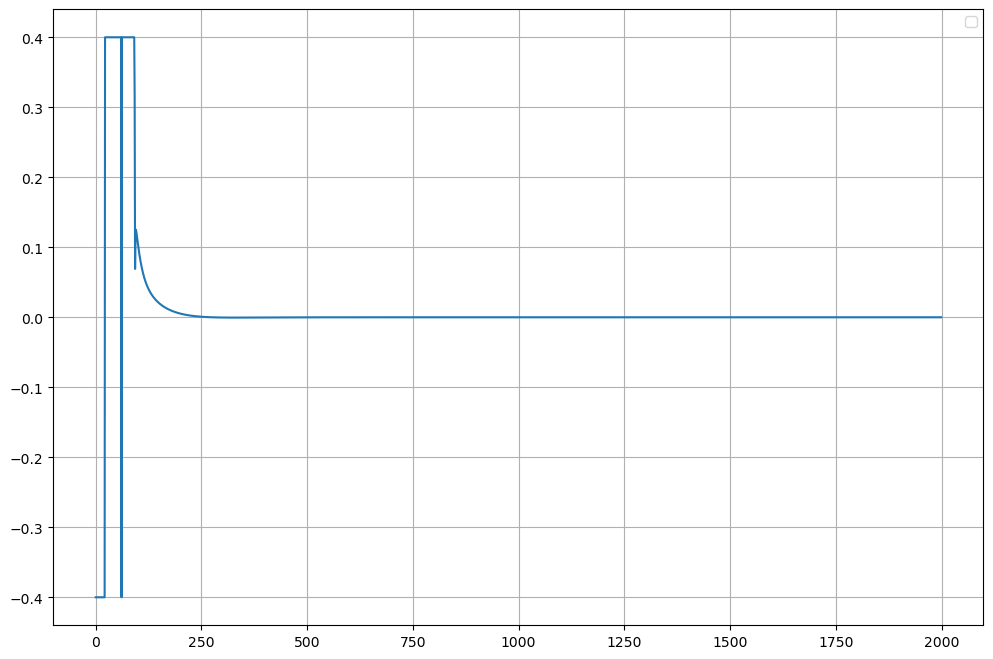

In [3]:
# %load_ext autoreload
# %autoreload 2

import importlib
import lqr_expert

# Reload the module
importlib.reload(lqr_expert)

from lqr_expert import LQRExpert

def simulate_expert():
    env = gym.make("FurutaPendulum-v0", render_mode="human")
    env.reset()
    obs = env.reset_model()

    observations = []
    rewards = []
    actions = []
    lqr_expert = LQRExpert()

    for _ in range(max_episode_steps):
        action = lqr_expert([obs])
        obs, reward, done, info, _ = env.step(action[0][0])
        observations.append(obs)
        actions.append(action[0][0])
        rewards.append(reward)
        env.render()
        if done:
            break
    env.close()

    return observations, rewards, actions


observations, rewards, actions = simulate_expert()
plot_observations(observations)
plot_value(rewards)
plot_value(actions)

/home/pendulum/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


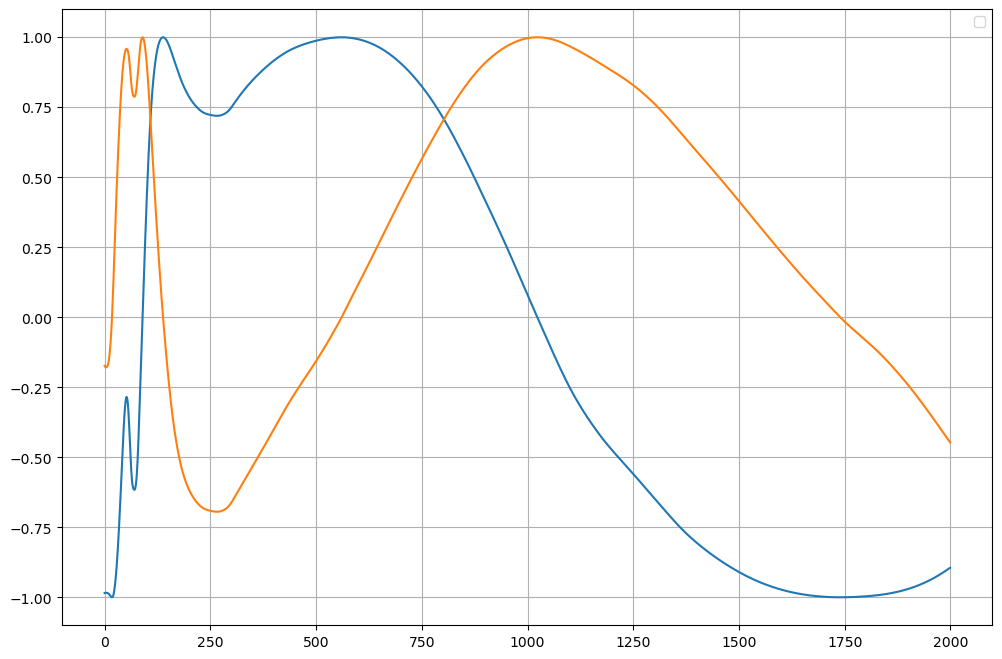

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


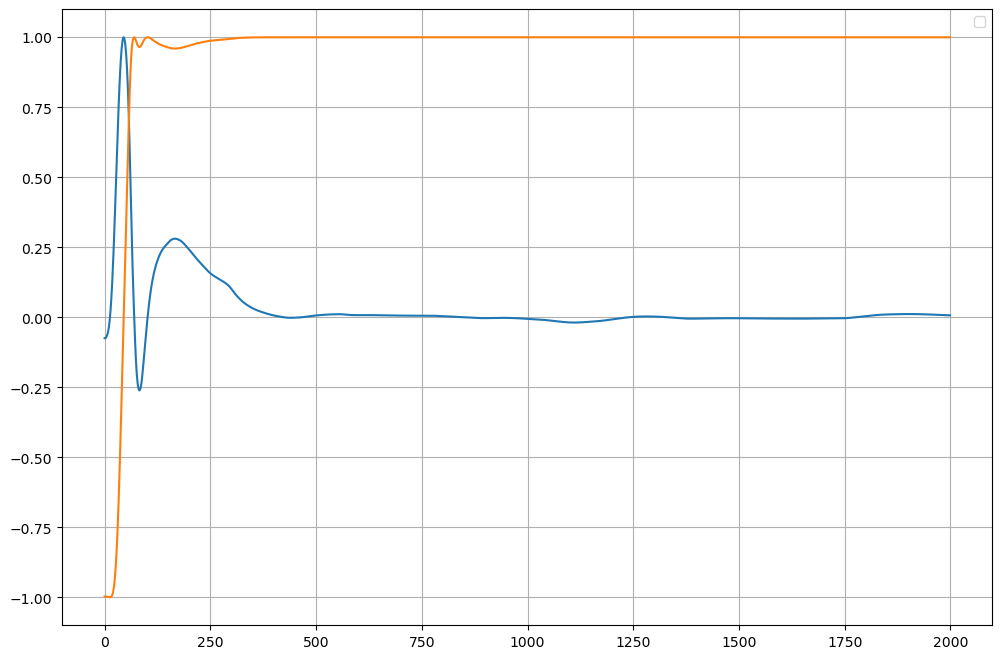

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


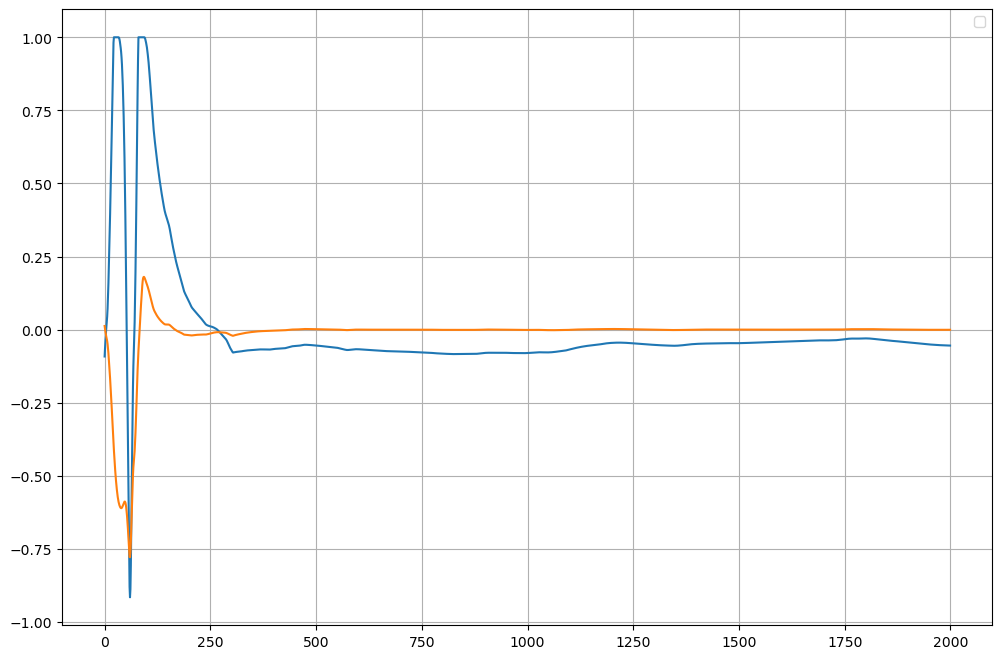

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


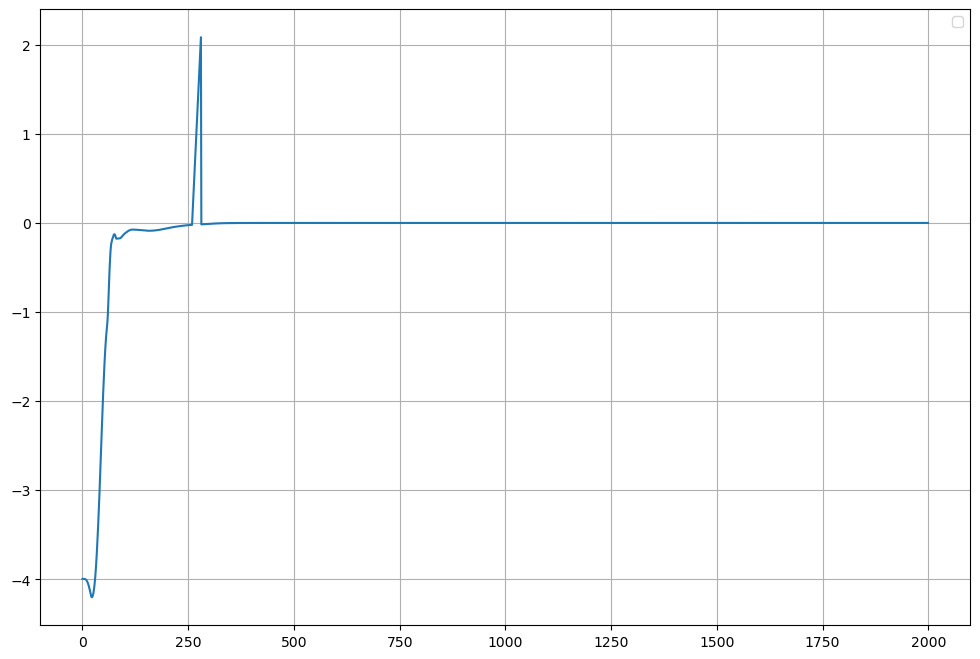

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


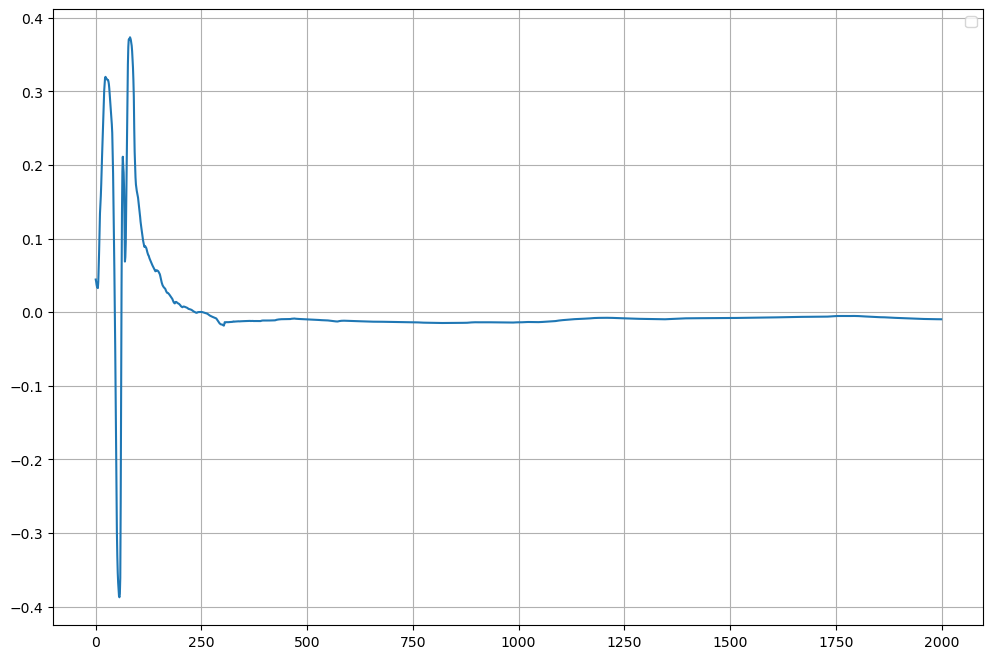

In [4]:
from stable_baselines3 import SAC


def simulate_model():
    env = gym.make("FurutaPendulum-v0", render_mode="human")
    env.reset()
    obs = env.reset_model()

    model = SAC.load(
        "/home/pendulum/ros2_ws/src/furuta_pendulum/furuta_pendulum_rl/trained_agents/furuta_pendulum_full_pretrained"
        # "/home/pendulum/ros2_ws/src/furuta_pendulum/furuta_pendulum_rl/trained_agents/furuta_pendulum_full"
    )

    observations = []
    rewards = []
    actions = []

    for _ in range(max_episode_steps):
        action = model.predict([obs])
        obs, reward, done, info, _ = env.step(action[0][0])
        observations.append(obs)
        actions.append(action[0][0])
        rewards.append(reward)
        env.render()
        if done:
            break
    env.close()

    return observations, rewards, actions


observations, rewards, actions = simulate_model()
plot_observations(observations)
plot_value(rewards)
plot_value(actions)

/home/pendulum/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


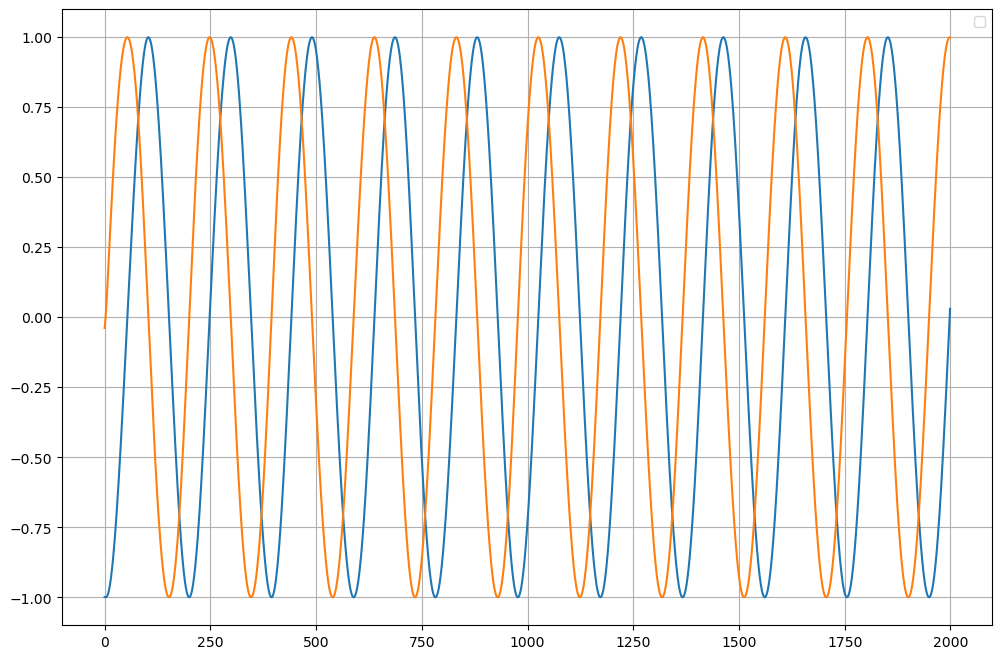

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


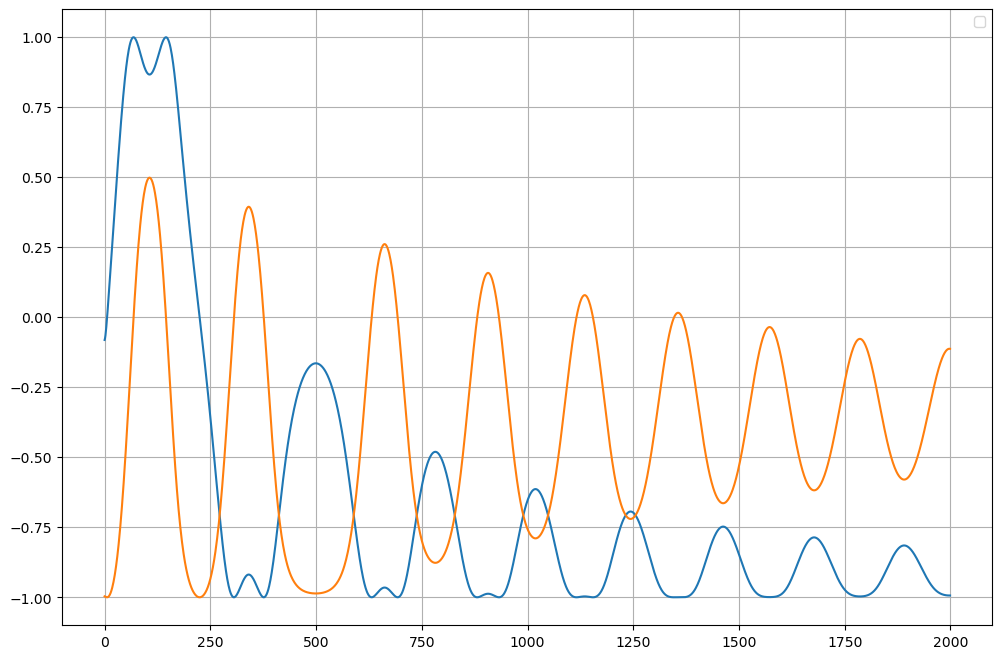

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


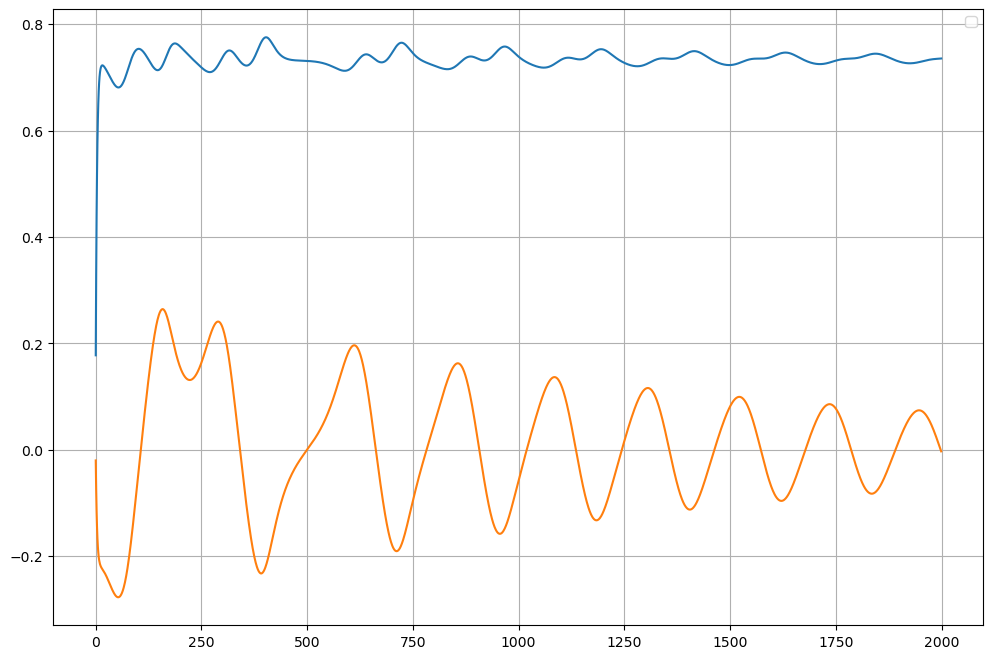

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


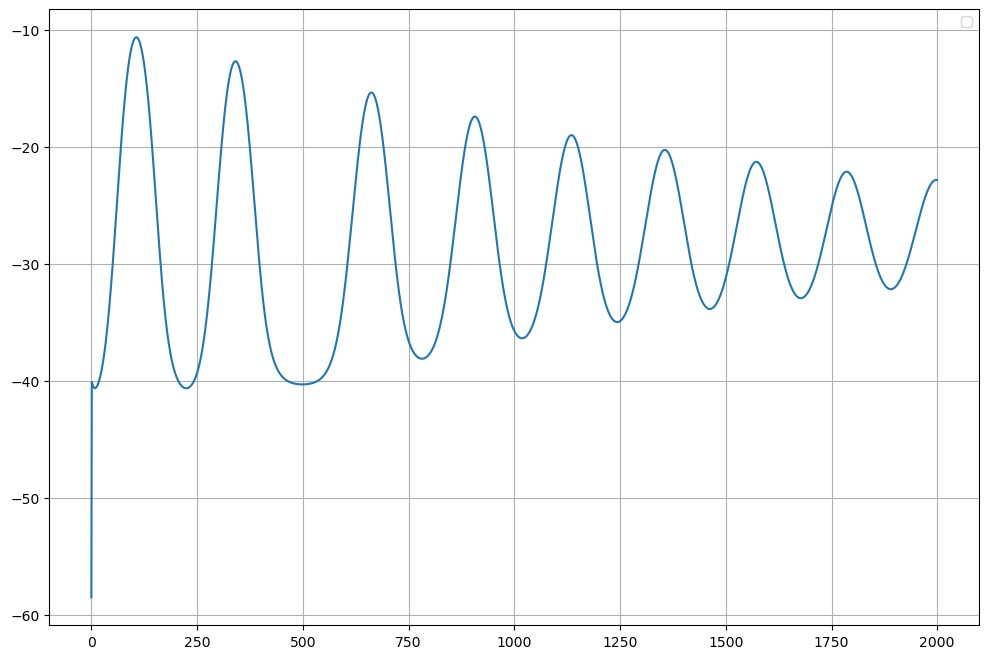

In [3]:
observations, rewards = simulate(0.43)
plot_observations(observations)
plot_value(rewards)

In [9]:
print(observations[-3])
print(observations[-2])
print(observations[-1])

[ 0.58413581 -0.81165593  0.9918056  -0.12775624  1.          0.03571795
  0.62217716 -0.78287648  0.99226924 -0.12410382  1.          0.03992596
  0.43      ]
[ 0.54476392 -0.83858946  0.99138588 -0.13097345  1.          0.03129144
  0.58413581 -0.81165593  0.9918056  -0.12775624  1.          0.03571795
  0.43      ]
[ 0.50415125 -0.86361537  0.99101695 -0.13373634  1.          0.02667403
  0.54476392 -0.83858946  0.99138588 -0.13097345  1.          0.03129144
  0.43      ]


/home/pendulum/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:137: UserWarning: WARN: The obs returned by the `reset()` method was expecting a numpy array, actual type: <class 'list'>
  logger.warn(
/home/pendulum/.local/lib/python3.10/site-packages/gym/spaces/box.py:227: UserWarning: WARN: Casting input x to numpy array.
  logger.warn("Casting input x to numpy array.")
/home/pendulum/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/home/pendulum/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:137: UserWarning: WARN: The obs returned by the `step()` method was expecting a numpy array, actual type: <class 'list'>
  logger.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argu

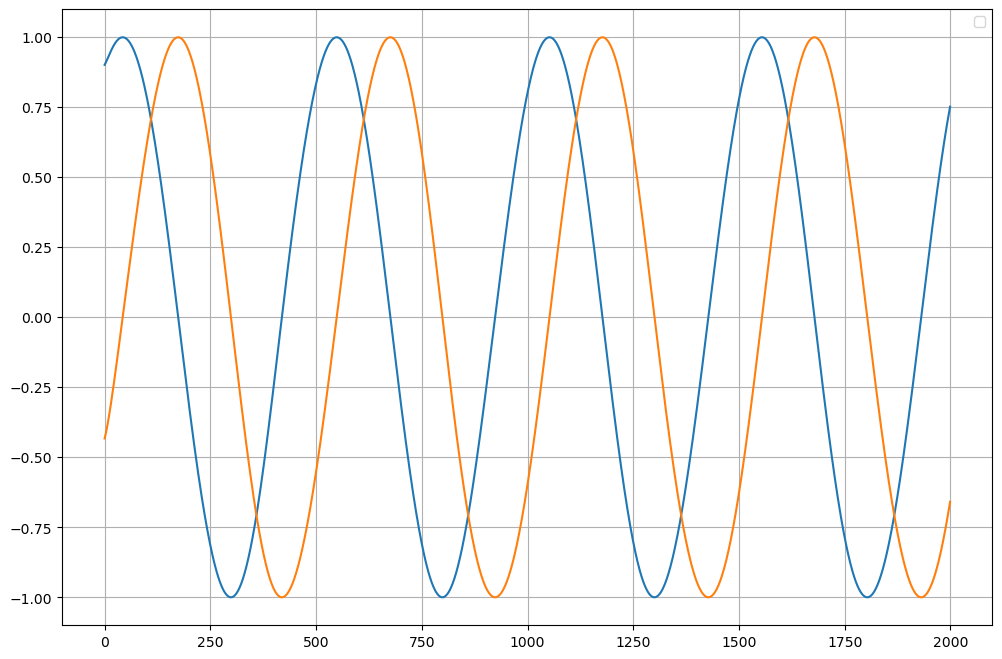

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


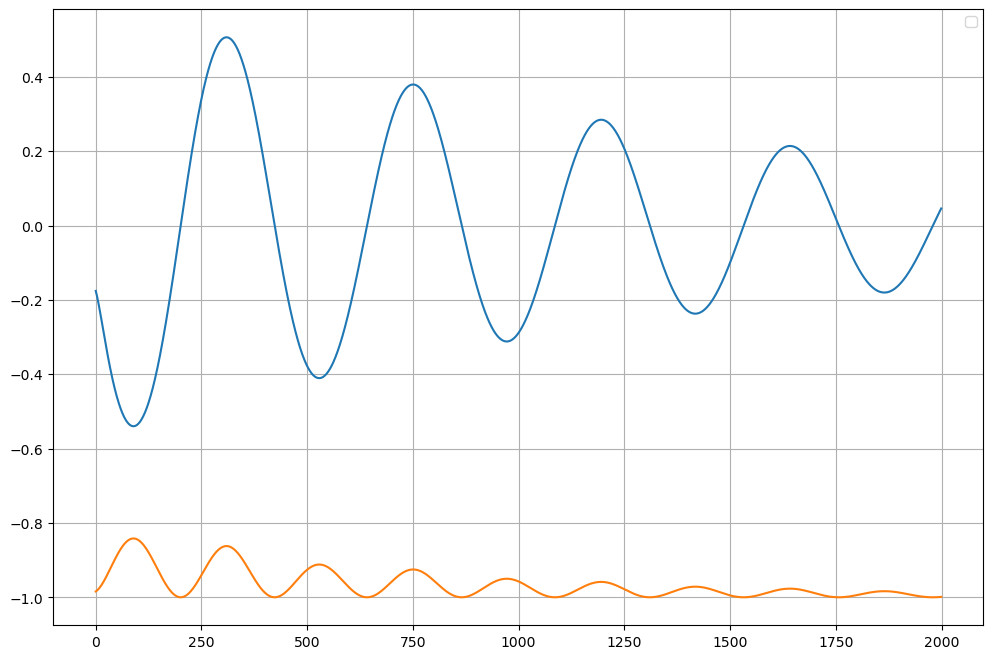

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


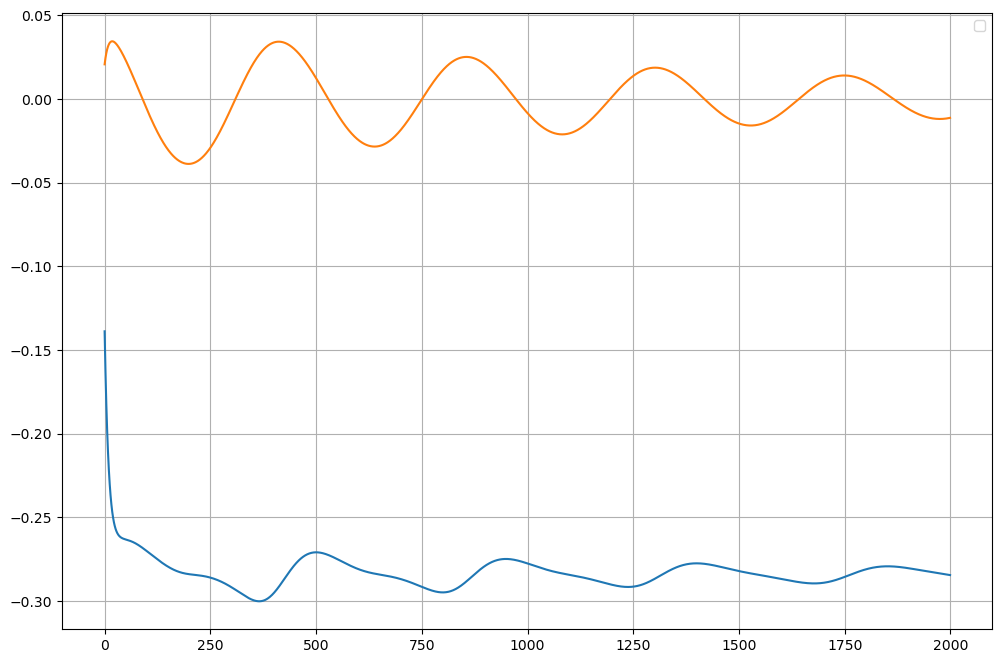

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


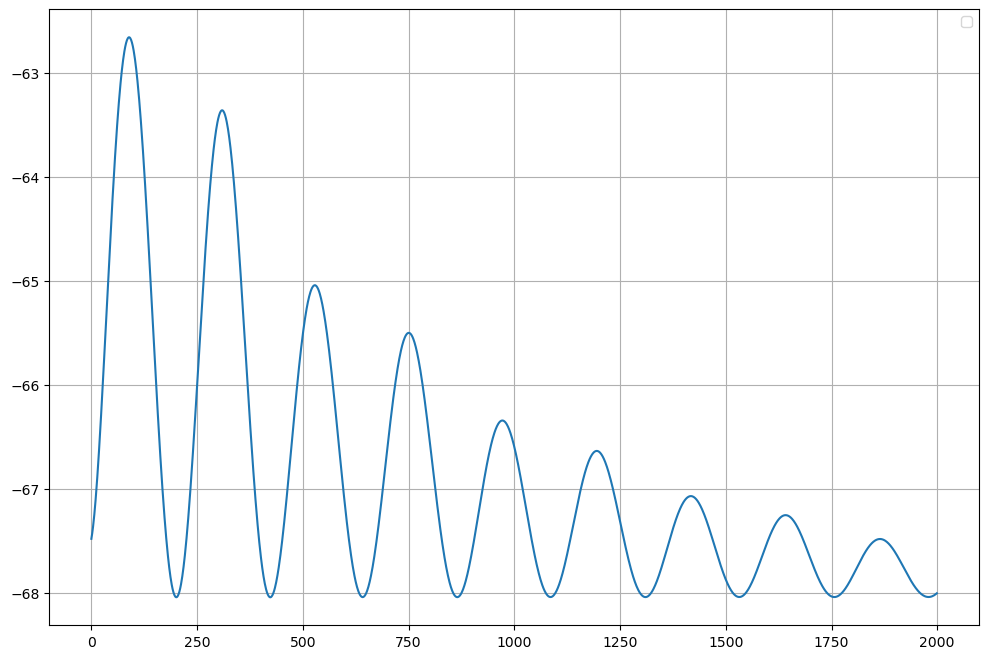

In [10]:
observations, rewards = simulate(-0.05)
plot_observations(observations)
plot_value(rewards)

In [10]:
print(observations[-3][12], actions[-4][0])
print(observations[-2][12], actions[-3][0])
print(observations[-1][12], actions[-2][0])

0.18937712907791138 0.18937713
0.17398685216903687 0.17398685
0.15768271684646606 0.15768272
